In [2]:
import pandas as pd    #Pandas is a Python library used for working with data sets.It has functions for analyzing, cleaning, exploring, and manipulating data.
import numpy as np     #Numpy Python library is used for including any type of mathematical operation in the code. It is the fundamental package for scientific calculation in Python. 
from sklearn.model_selection import train_test_split    #train_test_split is a function in Sklearn model selection for splitting data arrays into two subsets: for training data and for testing data. With this function, you don't need to divide the dataset manually. By default, Sklearn train_test_split will make random partitions for the two subsets.
from sklearn.impute import SimpleImputer  #SimpleImputer it replace the missing values by the strategy means mean or mode mean for numerical columns and mode for categorical columns
from sklearn.preprocessing import StandardScaler #StandardScaler is used for scalling the data and make the data unitless also minimizing the values
import matplotlib.pyplot as plt #matplotlib, which is a Python 2D plotting library, and with this library, we need to import a sub-library pyplot. This library is used to plot any type of charts in Python for the code
import seaborn as sns
%matplotlib inline 
import plotly.graph_objs as go
import plotly.subplots as sp

In [3]:
traindf=pd.read_csv("/kaggle/input/playground-series-s3e12/train.csv")
testdf=pd.read_csv("/kaggle/input/playground-series-s3e12/test.csv")
org_df=pd.read_csv("/kaggle/input/kidney-stone-prediction-based-on-urine-analysis/kindey stone urine analysis.csv")

In [4]:
def DataUnderstanding(DataFrame):
  """
  Parameters:DataFrame
  This function returns the first 5 rows, shape and datatype of each column
  """
  print("###The top 5 rows in the DataSet###\n",DataFrame.head(5)) 
  print("**"*50)
  print("###The shape of the DataSet###\n",DataFrame.shape)  
  print("**"*50)
  print("###Data types of the columns###\n",DataFrame.dtypes)

In [5]:
DataUnderstanding(traindf)

###The top 5 rows in the DataSet###
    id  gravity    ph  osmo  cond  urea  calc  target
0   0    1.013  6.19   443  14.8   124  1.45       0
1   1    1.025  5.40   703  23.6   394  4.18       0
2   2    1.009  6.13   371  24.5   159  9.04       0
3   3    1.021  4.91   442  20.8   398  6.63       1
4   4    1.021  5.53   874  17.8   385  2.21       1
****************************************************************************************************
###The shape of the DataSet###
 (414, 8)
****************************************************************************************************
###Data types of the columns###
 id           int64
gravity    float64
ph         float64
osmo         int64
cond       float64
urea         int64
calc       float64
target       int64
dtype: object


In [6]:
DataUnderstanding(org_df)

###The top 5 rows in the DataSet###
    gravity    ph  osmo  cond  urea  calc  target
0    1.021  4.91   725  14.0   443  2.45       0
1    1.017  5.74   577  20.0   296  4.49       0
2    1.008  7.20   321  14.9   101  2.36       0
3    1.011  5.51   408  12.6   224  2.15       0
4    1.005  6.52   187   7.5    91  1.16       0
****************************************************************************************************
###The shape of the DataSet###
 (79, 7)
****************************************************************************************************
###Data types of the columns###
 gravity    float64
ph         float64
osmo         int64
cond       float64
urea         int64
calc       float64
target       int64
dtype: object


In [7]:
traindf

,id,gravity,ph,osmo,cond,urea,calc,target
0,0,1.013,6.19,443,14.8,124,1.45,0
1,1,1.025,5.40,703,23.6,394,4.18,0
2,2,1.009,6.13,371,24.5,159,9.04,0
3,3,1.021,4.91,442,20.8,398,6.63,1
4,4,1.021,5.53,874,17.8,385,2.21,1
...,...,...,...,...,...,...,...,...
409,409,1.011,5.21,527,21.4,75,1.53,0
410,410,1.024,5.53,577,19.7,224,0.77,0
411,411,1.018,6.28,455,22.2,270,7.68,1
412,412,1.008,7.12,325,12.6,75,1.03,1


In [8]:
org_df

,gravity,ph,osmo,cond,urea,calc,target
0,1.021,4.91,725,14.0,443,2.45,0
1,1.017,5.74,577,20.0,296,4.49,0
2,1.008,7.20,321,14.9,101,2.36,0
3,1.011,5.51,408,12.6,224,2.15,0
4,1.005,6.52,187,7.5,91,1.16,0
...,...,...,...,...,...,...,...
74,1.025,7.90,721,23.6,301,9.04,1
75,1.017,4.81,410,13.3,195,0.58,1
76,1.024,5.40,803,21.8,394,7.82,1
77,1.016,6.81,594,21.4,255,12.20,1


In [9]:
def Del_columns(DataFrame, Colm=None):
    """
    Parametrs:DataFrame,Colm is contains the columns are to be deleted
    This function delete the column and prints the before and after columns
    """
    print('Before dropping: ', DataFrame.columns)
    DataFrame.drop(columns=Colm,axis=1, inplace=True)
    print('After dropping: ', DataFrame.columns)

In [10]:
Del_columns(traindf,Colm='id')

Before dropping:  Index(['id', 'gravity', 'ph', 'osmo', 'cond', 'urea', 'calc', 'target'], dtype='object')
After dropping:  Index(['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc', 'target'], dtype='object')


In [11]:
traindf=pd.concat([traindf,org_df],axis=0,ignore_index=True)

In [12]:
DataUnderstanding(traindf)

###The top 5 rows in the DataSet###
    gravity    ph  osmo  cond  urea  calc  target
0    1.013  6.19   443  14.8   124  1.45       0
1    1.025  5.40   703  23.6   394  4.18       0
2    1.009  6.13   371  24.5   159  9.04       0
3    1.021  4.91   442  20.8   398  6.63       1
4    1.021  5.53   874  17.8   385  2.21       1
****************************************************************************************************
###The shape of the DataSet###
 (493, 7)
****************************************************************************************************
###Data types of the columns###
 gravity    float64
ph         float64
osmo         int64
cond       float64
urea         int64
calc       float64
target       int64
dtype: object


In [13]:
def Unique_Vals(DataFrame, Colm=None):
  """
  Parameters: DataFrame , Colm is the columns of the dataframe 
  this function will return the unique values and its count in the dataframe
  
  """
  for i in  Colm:
    print('Number of unique values in',i,'is ', DataFrame[i].nunique(),'\n') #returns the number of unique values for each column.
    print(DataFrame[i].value_counts())
    print("**"*50)
    print("**"*50)

In [14]:
Unique_Vals(traindf,Colm=traindf.columns)

Number of unique values in gravity is  29 

1.021    57
1.017    55
1.020    38
1.025    35
1.008    34
1.011    33
1.024    29
1.015    25
1.010    23
1.018    17
1.014    16
1.026    13
1.019    12
1.023    12
1.022    11
1.013    11
1.012    11
1.007    11
1.009    10
1.034     7
1.028     7
1.033     5
1.031     5
1.005     4
1.040     4
1.006     3
1.029     2
1.027     2
1.016     1
Name: gravity, dtype: int64
****************************************************************************************************
****************************************************************************************************
Number of unique values in ph is  75 

5.53    36
5.68    18
6.13    15
5.58    15
6.19    14
        ..
6.24     1
5.63     1
6.58     1
7.30     1
5.14     1
Name: ph, Length: 75, dtype: int64
****************************************************************************************************
**********************************************************************************

In [15]:
 def Null_vals(DataFrame,Colm=None):
  """
  Parametrs:DataFRame,Colm is the columns to check for null values 
  this fucntion will checks the null values returns its count
  """
  for i in Colm:
    print("The no of Null_values in ",i,"is:",DataFrame[i].isnull().sum())

In [16]:
Null_vals(traindf,Colm=traindf.columns)

The no of Null_values in  gravity is: 0
The no of Null_values in  ph is: 0
The no of Null_values in  osmo is: 0
The no of Null_values in  cond is: 0
The no of Null_values in  urea is: 0
The no of Null_values in  calc is: 0
The no of Null_values in  target is: 0


In [17]:
print(f'There are {traindf.duplicated(subset = list(traindf)[0:-1]).value_counts()[0]} non-duplicate values out of {traindf.count()[0]} rows in train dataset')
print(f'There are {testdf.duplicated(subset=list(traindf)[0:-1]).value_counts()[0]} non-duplicate values out of {testdf.count()[0]} rows in test dataset')

There are 491 non-duplicate values out of 493 rows in train dataset
There are 276 non-duplicate values out of 276 rows in test dataset


In [18]:
import plotly.express as px
corr_matrix = traindf.corr()

# create a heatmap with annotations using plotly
fig = px.imshow(corr_matrix.values, x=corr_matrix.columns, y=corr_matrix.columns,
                labels=dict(x="Features", y="Features", color="Correlation_Intensity_Range"),
                color_continuous_scale="RdBu", zmin=-1, zmax=1)

# set the plot title
fig.update_layout(title="Feature Correlation Heatmap")

# show the plot
fig.show()

In [19]:
def convdtypes(DataFrame,Colm=None):
  print("Before Convertion of Datatypes:",DataFrame.dtypes)
  print("***"*50)
  print("***"*50)
  for i in Colm:
    DataFrame[i]=DataFrame[i].astype("category")
  print("After Convertion of Datatypes:",DataFrame.dtypes)

In [20]:
convdtypes(traindf,Colm=['target'])

Before Convertion of Datatypes: gravity    float64
ph         float64
osmo         int64
cond       float64
urea         int64
calc       float64
target       int64
dtype: object
******************************************************************************************************************************************************
******************************************************************************************************************************************************
After Convertion of Datatypes: gravity     float64
ph          float64
osmo          int64
cond        float64
urea          int64
calc        float64
target     category
dtype: object


In [21]:
traindf.columns

Index(['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc', 'target'], dtype='object')

In [22]:
num_cols=['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc']

In [23]:
from itertools import combinations
column_pairs = list(combinations(num_cols, 2))
for col in column_pairs:
    x_col,y_col = col
    fig = go.Figure()
    fig.add_trace(go.Scatter(x=traindf[x_col], y=traindf[y_col], mode='markers'))
    fig.update_layout(title=f'{x_col} vs. {y_col}',xaxis_title=x_col,yaxis_title=y_col)
    fig.show()
    

In [24]:
fig = sp.make_subplots(rows=len(num_cols), cols=1, subplot_titles=num_cols)
for i, col in enumerate(num_cols,1):
    fig.add_trace(go.Box(x=traindf[col], name=col, boxmean=True), row=i, col=1)

# update the plot layout
fig.update_layout(title="Boxplots of Numerical Data", height=2000, width=800)

# show the plot
fig.show()

In [25]:
fig = sp.make_subplots(rows=len(num_cols), cols=1, subplot_titles=num_cols)
for i, col in enumerate(num_cols):
    fig.add_trace(go.Histogram(x=traindf[col], name=col), row=i+1, col=1)

# update the plot layout
fig.update_layout(title="Histogram of Numerical Data", height=2000, width=800)

# show the plot
fig.show()

<AxesSubplot:>

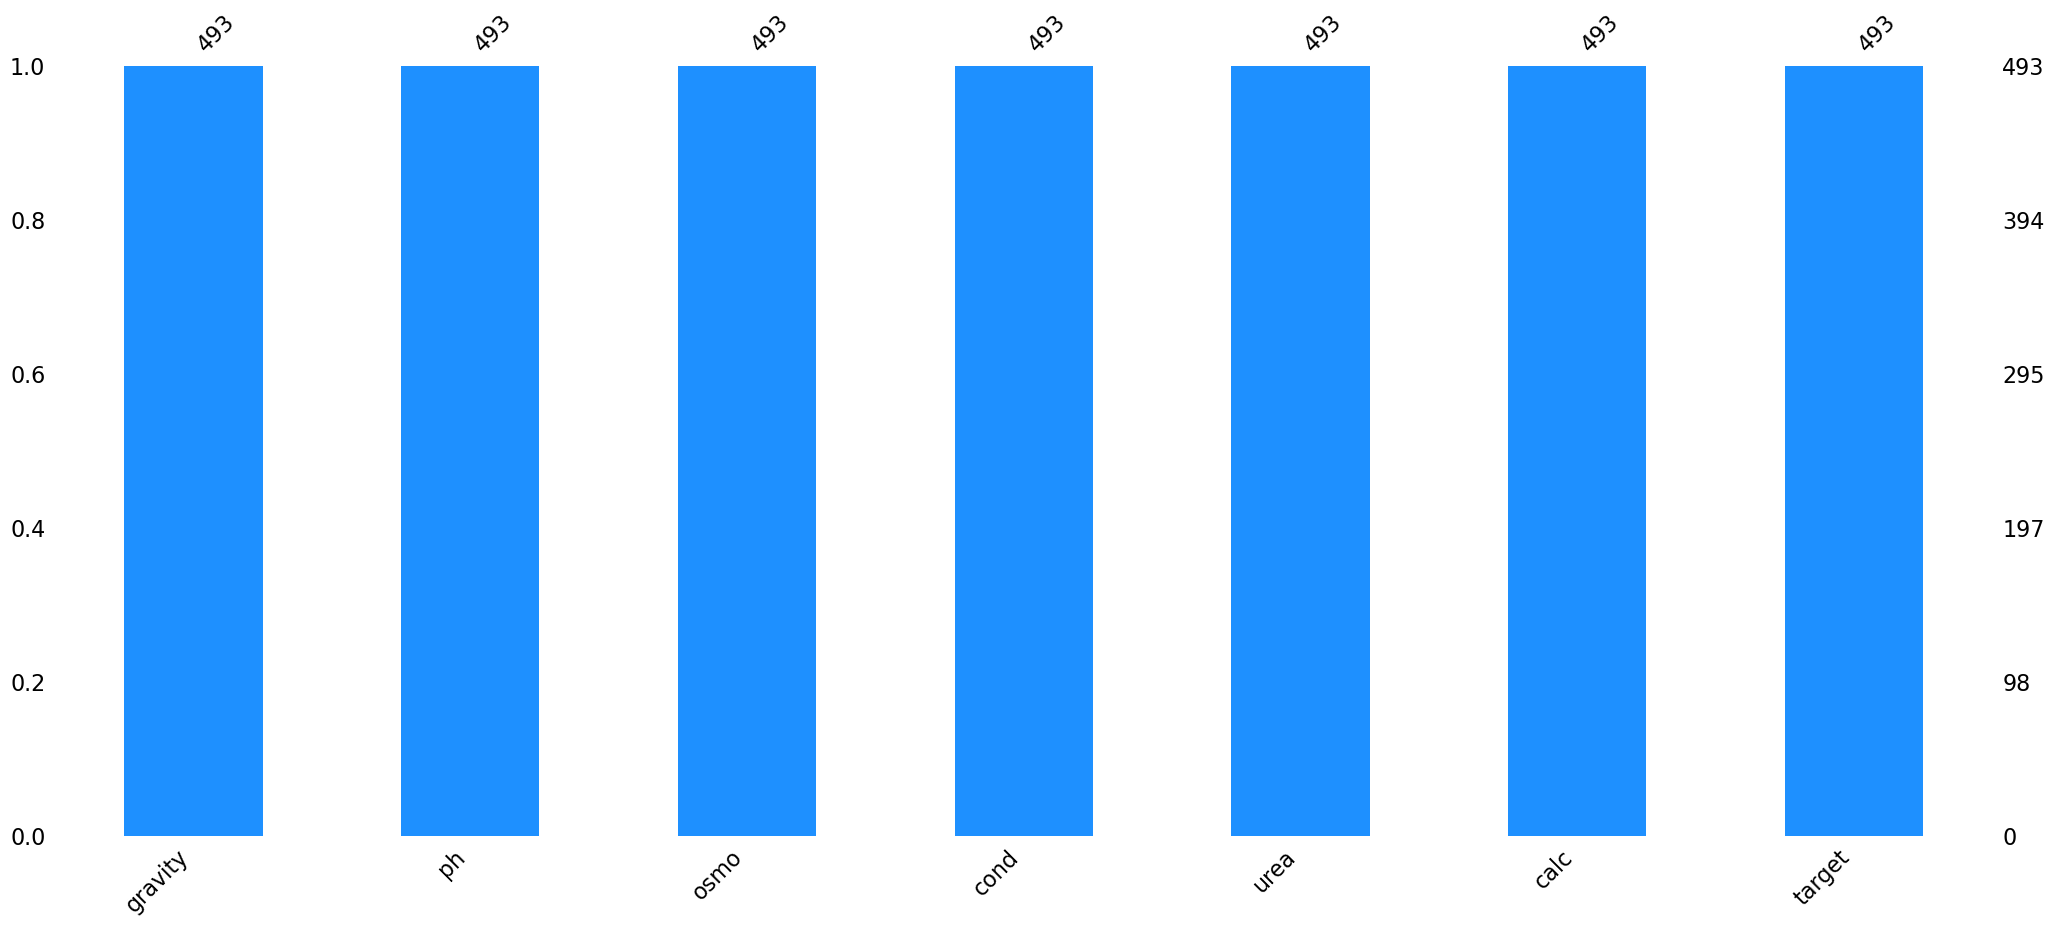

In [26]:
import missingno as msn
msn.bar(traindf,color="dodgerblue")

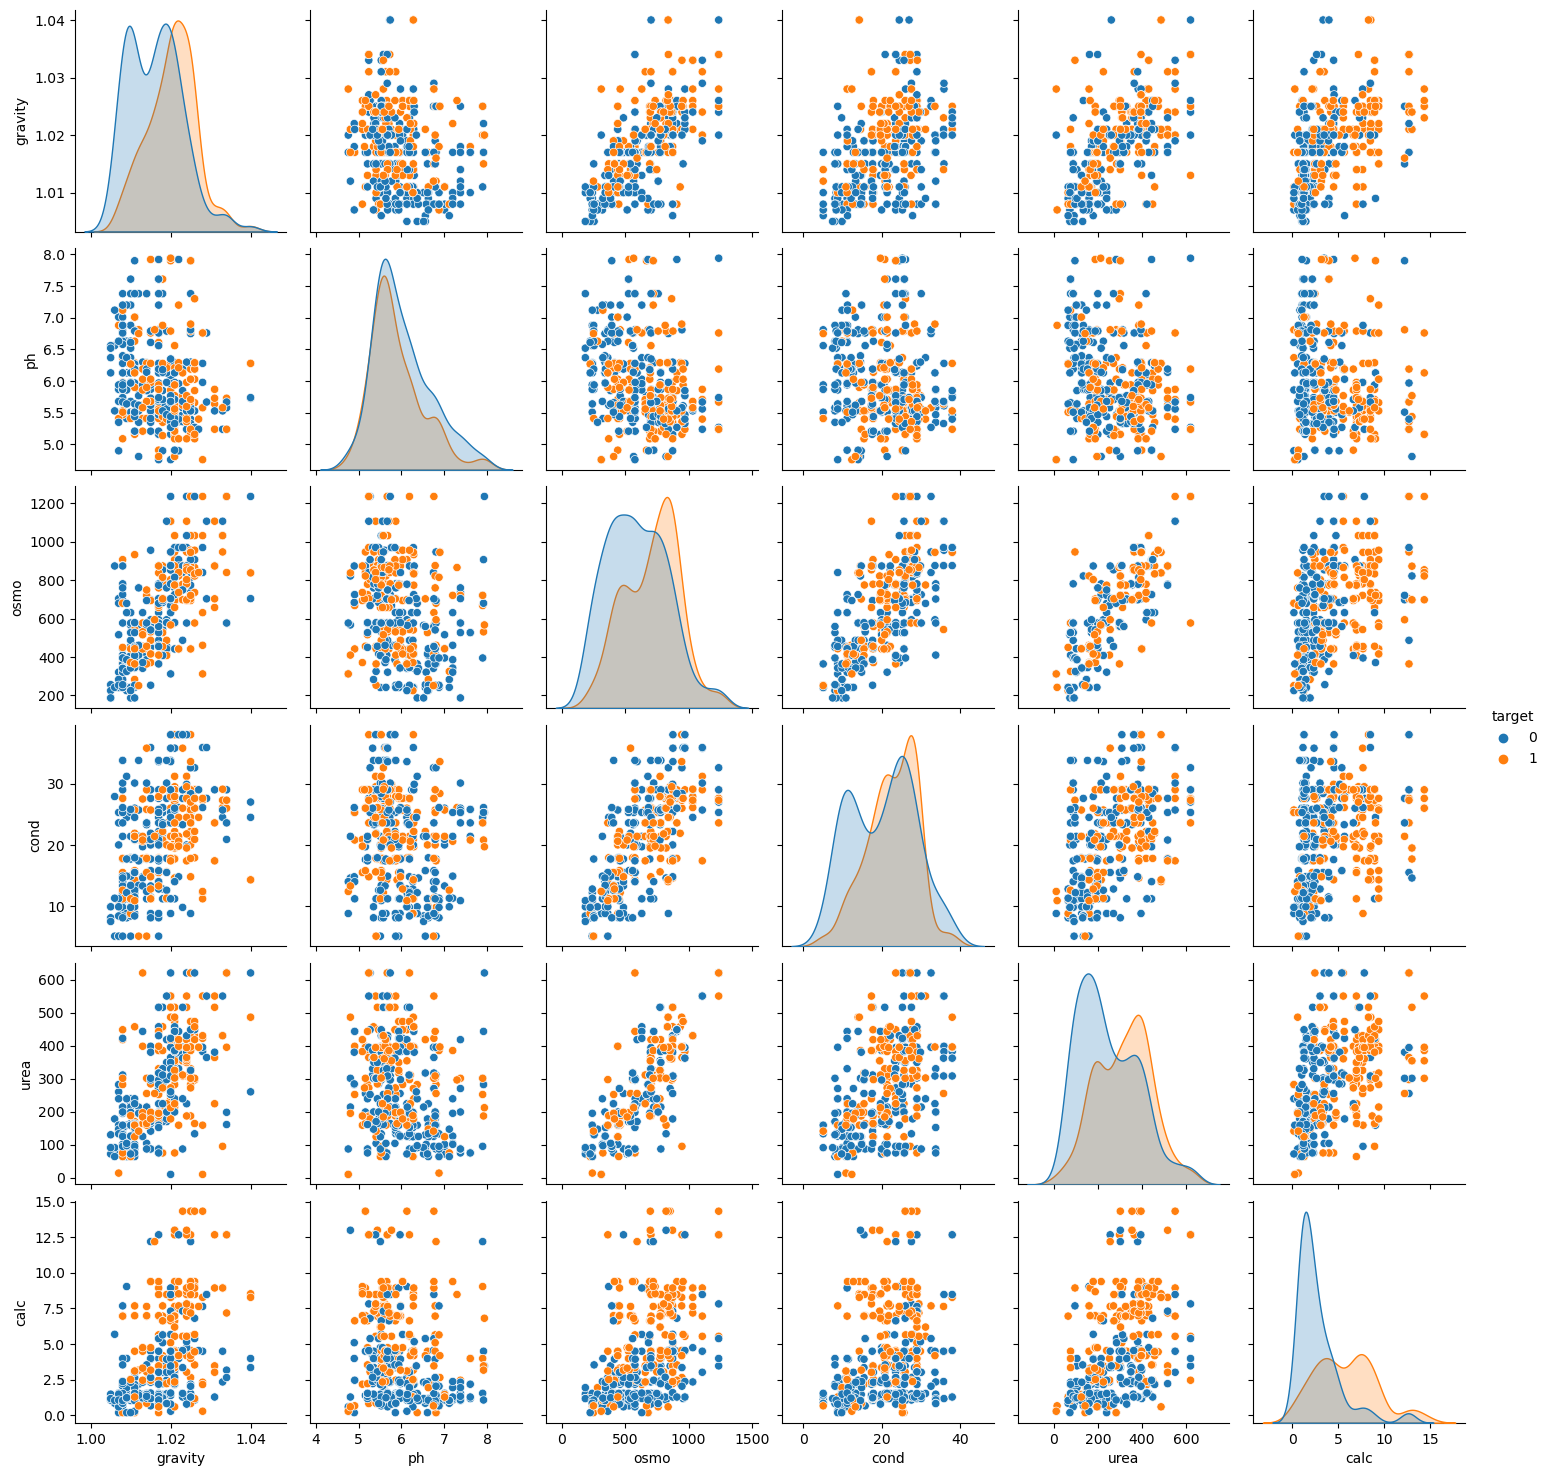

In [27]:
sns.pairplot(traindf, diag_kind="kde", markers="o", hue="target")

<AxesSubplot:xlabel='calc', ylabel='target'>

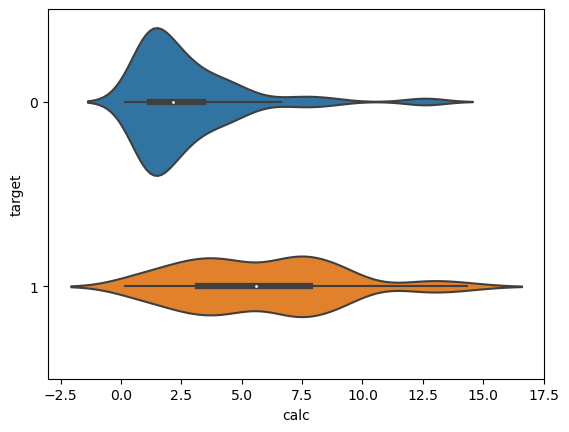

In [28]:
sns.violinplot(x="calc", y="target", data=traindf)

In [29]:
def X_Y_df(DataFrame,target_col):
  y = DataFrame[target_col]
  X = DataFrame.drop(columns=target_col,axis=1)
  print("Shape of X is:",X.shape)
  print("Shape of y is:",y.shape)
  return X,y

In [30]:
X,y=X_Y_df(traindf,'target')

Shape of X is: (493, 6)
Shape of y is: (493,)


In [31]:
from imblearn.over_sampling import SMOTE
oversample = SMOTE()
X1, y1 = oversample.fit_resample(X, y)

In [32]:
  print("Shape of X is:",X1.shape)
  print("Shape of y is:",y1.shape)

Shape of X is: (550, 6)
Shape of y is: (550,)


In [33]:
def Train_Test_df(X,y):
  X_train,X_test,y_train,y_test =train_test_split(X,y,test_size=0.1,stratify=y,random_state=123)
  print("The Shape of X_train is:",X_train.shape)
  print("The Shape of X_test is:",X_test.shape)
  print("The Shape of y_train is:",y_train.shape)
  print("The Shape of y_test is:",y_test.shape)
  return X_train,X_test,y_train,y_test

In [34]:
X_train,X_test,y_train,y_test=Train_Test_df(X1,y1)

The Shape of X_train is: (495, 6)
The Shape of X_test is: (55, 6)
The Shape of y_train is: (495,)
The Shape of y_test is: (55,)


In [35]:
scaler=StandardScaler()
scaler=scaler.fit(X_train)
X_train=pd.DataFrame(scaler.transform(X_train),columns=X_train.columns)  
X_test=pd.DataFrame(scaler.transform(X_test),columns=X_test.columns)

In [36]:
from sklearn.svm import SVC
svc=SVC(kernel='linear', C=1.0, random_state=100,probability=True)

In [37]:
svc=svc.fit(X_train, y_train)

In [38]:
svc_train_pred=svc.predict(X_train)
svc_test_pred=svc.predict(X_test)

In [39]:
svc_train_pred

array([1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0,
       1, 1, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0,
       0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1, 1,
       0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1,

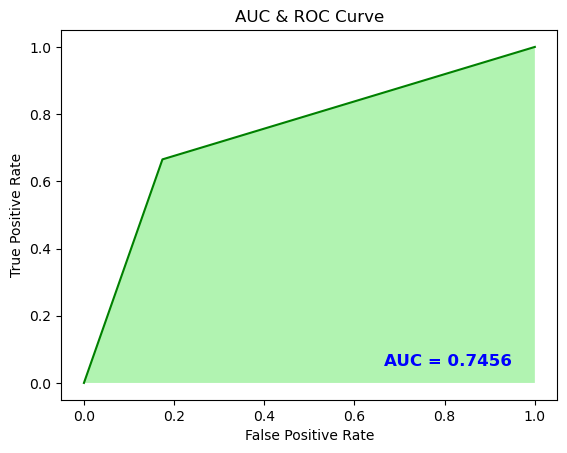

In [40]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_train, svc_train_pred)
false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_train, svc_train_pred)
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

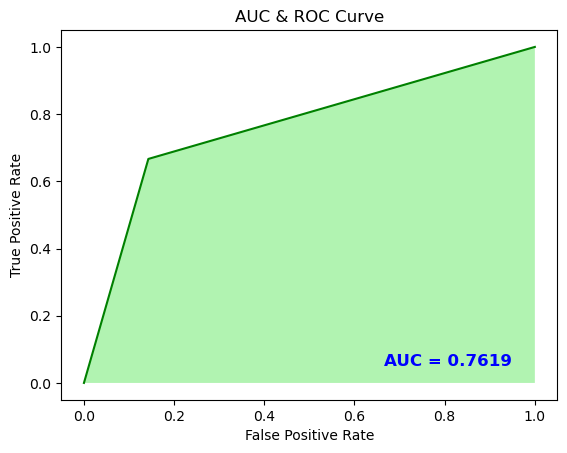

In [41]:
from sklearn import metrics
auc = metrics.roc_auc_score(y_test, svc_test_pred)
false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, svc_test_pred)
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [42]:
from catboost import CatBoostClassifier
catbst = CatBoostClassifier(iterations=100, learning_rate=0.1, depth=6)

In [43]:
catbst=catbst.fit(X_train,y_train,verbose=False)

In [44]:
cat_train_pred=catbst.predict(X_train)
cat_test_pred=catbst.predict(X_test)

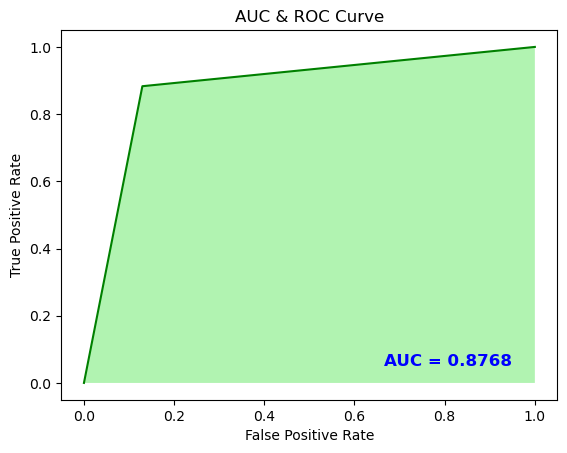

In [45]:
auc = metrics.roc_auc_score(y_train, cat_train_pred)
false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_train, cat_train_pred)
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

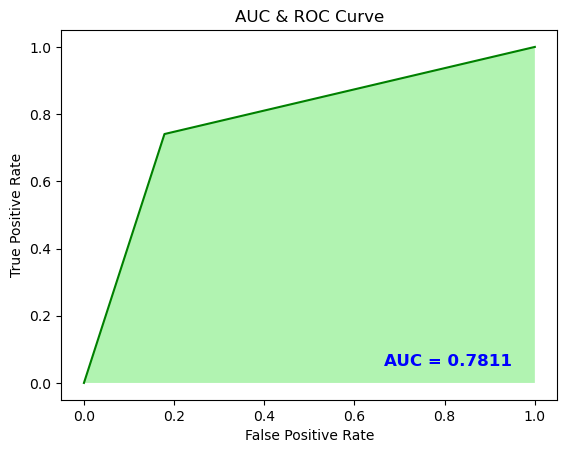

In [46]:
auc = metrics.roc_auc_score(y_test, cat_test_pred)
false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, cat_test_pred)
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [47]:
from catboost import CatBoostClassifier, Pool
from sklearn.model_selection import GridSearchCV
param_grid = {
    'iterations': [100, 200, 300],
    'learning_rate': [0.05, 0.1, 0.2],
    'depth': [4, 6, 8]
}

# Create a cross-validation object
catbstcv = GridSearchCV(
    estimator=catbst,  # the CatBoost model to use
    param_grid=param_grid,  # the grid of hyperparameters to search over
    cv=5,  # the number of cross-validation folds to use
    scoring='accuracy',  # the scoring metric to optimize for
    n_jobs=-1,  # the number of CPU cores to use (-1 means all available cores)
    verbose=2  # the verbosity level (0 means no output, higher values mean more output)
)

In [48]:
catbstcv=catbstcv.fit(X_train,y_train,verbose=False)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


In [49]:
cat_cv_train_pred=catbstcv.predict(X_train)
cat_cv_test_pred=catbstcv.predict(X_test)

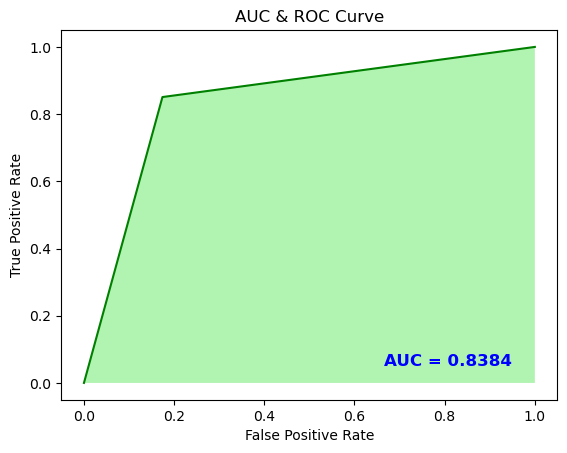

In [50]:
auc = metrics.roc_auc_score(y_train, cat_cv_train_pred)
false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_train, cat_cv_train_pred)
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

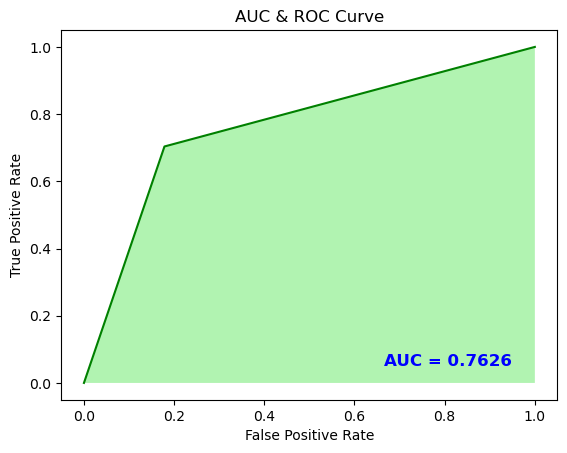

In [51]:
auc = metrics.roc_auc_score(y_test, cat_cv_test_pred)
false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, cat_cv_test_pred)
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [52]:
from xgboost import XGBClassifier
xgb = XGBClassifier(
    n_estimators=100,  # number of boosting rounds
    learning_rate=0.1,  # learning rate for each boosting round
    max_depth=3,  # maximum depth of each tree
    subsample=0.8,  # subsampling ratio for each boosting round
    colsample_bytree=0.8,  # feature subsampling ratio for each tree
    random_state=100,  # random seed for reproducibility
    use_label_encoder=False,  # whether to use label encoding for categorical features
    alpha=0.1
)

In [53]:
xgb=xgb.fit(X_train,y_train)

In [54]:
xgb_train_pred=xgb.predict(X_train)
xgb_test_pred=xgb.predict(X_test)

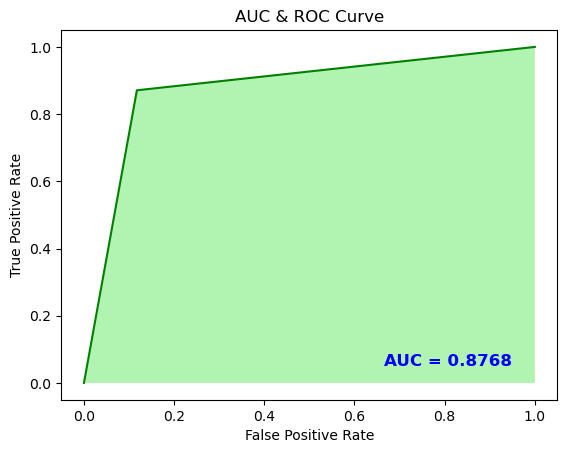

In [55]:
auc = metrics.roc_auc_score(y_train, xgb_train_pred)
false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_train, xgb_train_pred)
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

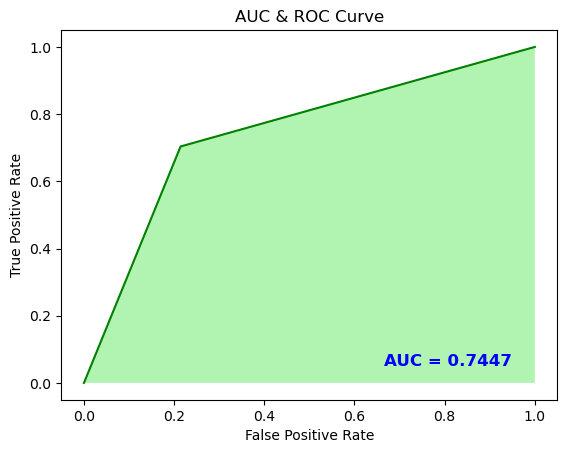

In [56]:
auc = metrics.roc_auc_score(y_test, xgb_test_pred)
false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test, xgb_test_pred)
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [57]:
from sklearn.linear_model import LogisticRegression
log_reg = LogisticRegression(penalty='l1', solver='liblinear', C=1.0)  
log_reg=log_reg.fit(X_train, y_train)  

In [58]:
log_train_pred=log_reg.predict(X_train)
log_test_pred=log_reg.predict(X_test)

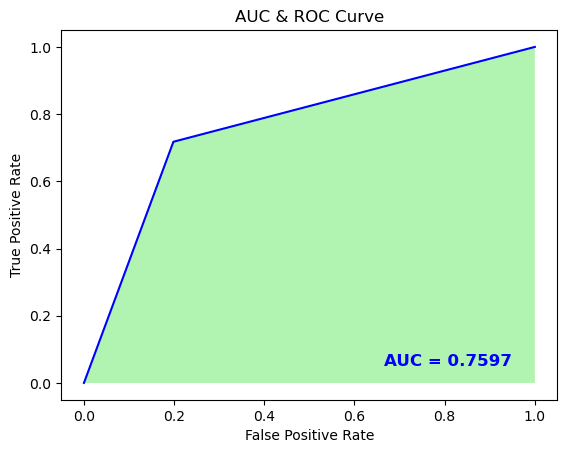

In [59]:
auc = metrics.roc_auc_score(y_train,log_train_pred)
false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_train,log_train_pred)
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'b')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

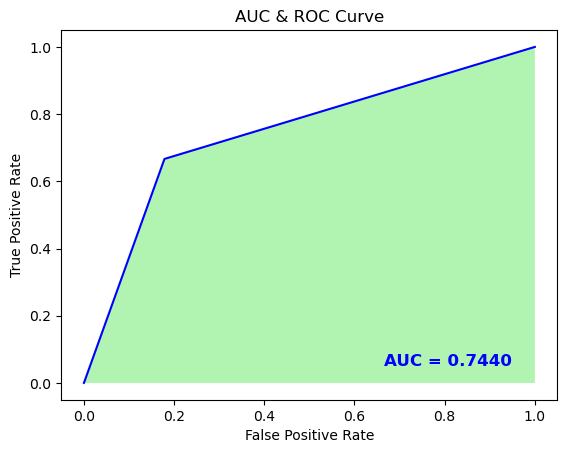

In [60]:
auc = metrics.roc_auc_score(y_test,log_test_pred)
false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test,log_test_pred)
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'b')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='lightgreen', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [61]:
from sklearn.ensemble import RandomForestClassifier

# Create a Random Forest classifier object
rfc = RandomForestClassifier(n_estimators=100,  # Number of trees in the forest
                                      max_depth=None,  # Maximum depth of the trees
                                      min_samples_split=2,  # Minimum number of samples required to split an internal node
                                      min_samples_leaf=1,  # Minimum number of samples required to be at a leaf node
                                      max_features='auto',  # Number of features to consider when looking for the best split
                                      bootstrap=True,  # Whether or not to use bootstrap samples when building trees
                                      random_state=42,  # Seed for random number generator
                                      n_jobs=-1,class_weight='balanced')  

In [62]:
rfc=rfc.fit(X_train,y_train)

In [63]:
rfc_train_pred=rfc.predict(X_train)
rfc_test_pred=rfc.predict(X_test)

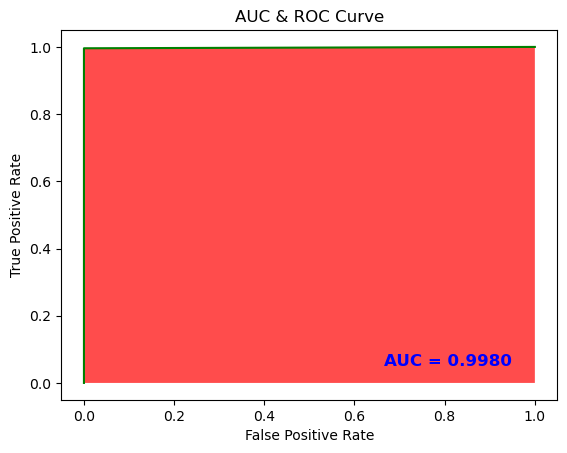

In [64]:
auc = metrics.roc_auc_score(y_train,rfc_train_pred)
false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_train,rfc_train_pred)
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='red', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

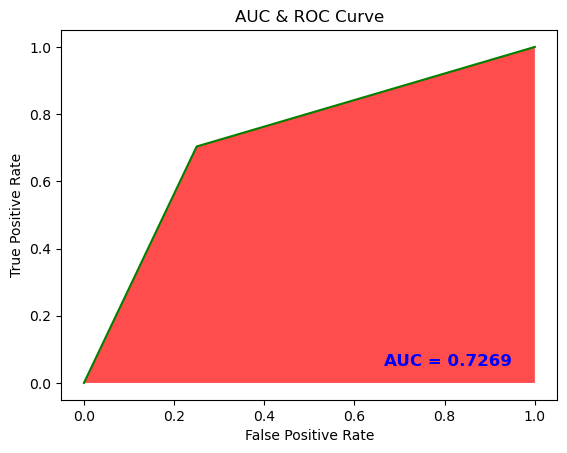

In [65]:
auc = metrics.roc_auc_score(y_test,rfc_test_pred)
false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(y_test,rfc_test_pred)
plt.title("AUC & ROC Curve")
plt.plot(false_positive_rate, true_positive_rate, 'g')
plt.fill_between(false_positive_rate, true_positive_rate, facecolor='red', alpha=0.7)
plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.show()

In [66]:
def auc_roc(actual,pred):
    auc = metrics.roc_auc_score(actual,pred)
    false_positive_rate, true_positive_rate, thresolds = metrics.roc_curve(actual,pred)
    plt.title("AUC & ROC Curve")
    plt.plot(false_positive_rate, true_positive_rate, 'g')
    plt.fill_between(false_positive_rate, true_positive_rate, facecolor='red', alpha=0.7)
    plt.text(0.95, 0.05, 'AUC = %0.4f' % auc, ha='right', fontsize=12, weight='bold', color='blue')
    plt.xlabel("False Positive Rate")
    plt.ylabel("True Positive Rate")
    plt.show()

In [67]:
from sklearn.model_selection import RandomizedSearchCV
from scipy.stats import randint
param_dist = {
    "n_estimators": randint(50, 200),
    "max_depth": randint(5, 15),
    "min_samples_split": randint(2, 10),
    "min_samples_leaf": randint(1, 5)
}
# Create RandomizedSearchCV object
rfc_rndcv= RandomizedSearchCV(
    rfc, param_distributions=param_dist, n_iter=100,
    cv=5, scoring='accuracy', random_state=42
)


In [68]:
rfc_rndcv=rfc_rndcv.fit(X_train,y_train)

In [69]:
rfc_rndcv_trainpred=rfc_rndcv.predict(X_train)
rfc_rndcv_testpred=rfc_rndcv.predict(X_test)

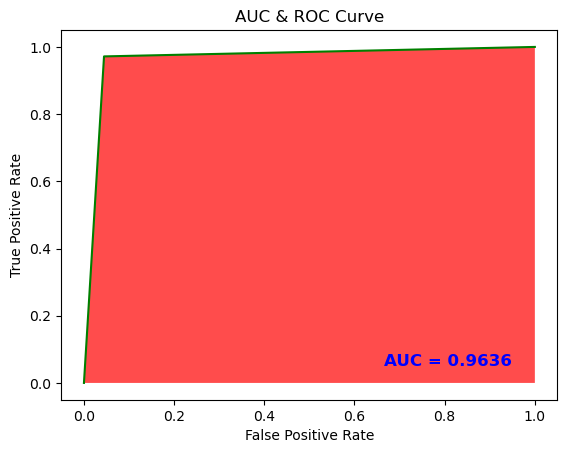

In [70]:
auc_roc(y_train,rfc_rndcv_trainpred)

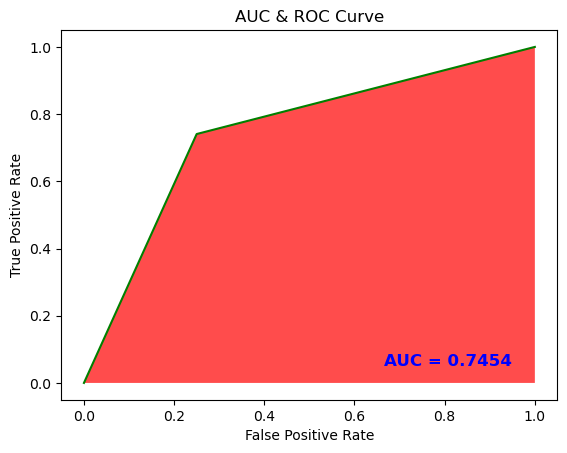

In [71]:
auc_roc(y_test,rfc_rndcv_testpred)

In [72]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
dtc = DecisionTreeClassifier(class_weight='balanced')

# Define the hyperparameter grid for tuning
param_grid = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize GridSearchCV with the decision tree classifier and hyperparameter grid
dtc_cv = GridSearchCV(dtc, param_grid, cv=5)
dtc_cv=dtc_cv.fit(X_train, y_train)

In [73]:
best_params = dtc_cv.best_params_

In [74]:
best_params

{'criterion': 'entropy',
 'max_depth': 5,
 'min_samples_leaf': 4,
 'min_samples_split': 2}

In [75]:
dtc_cvtrain_pred=dtc_cv.predict(X_train)
dtc_cvtest_pred=dtc_cv.predict(X_test)

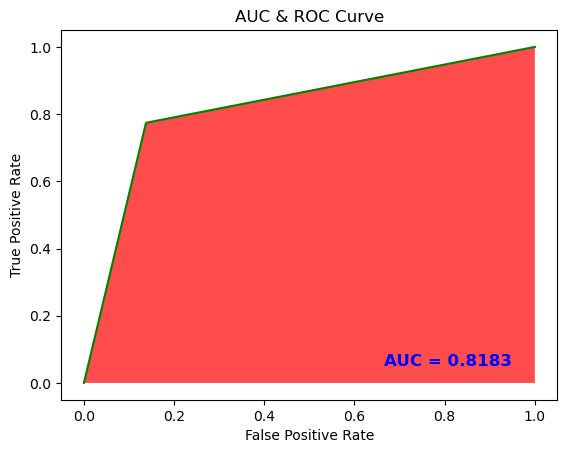

In [76]:
auc_roc(y_train,dtc_cvtrain_pred)

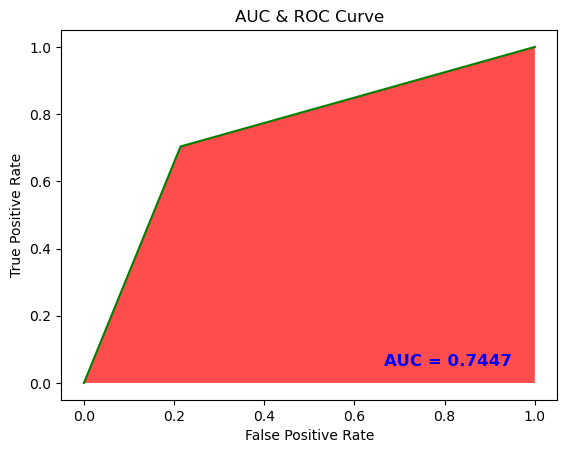

In [77]:
auc_roc(y_test,dtc_cvtest_pred)

In [78]:
dct= DecisionTreeClassifier(**best_params,class_weight='balanced')

In [79]:
dct=dct.fit(X_train,y_train)

In [80]:
dct_train_pred=dct.predict(X_train)
dct_test_pred=dct.predict(X_test)

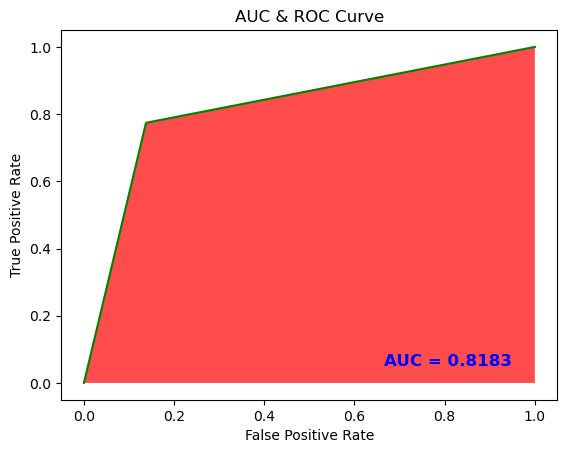

In [81]:
auc_roc(y_train,dct_train_pred)

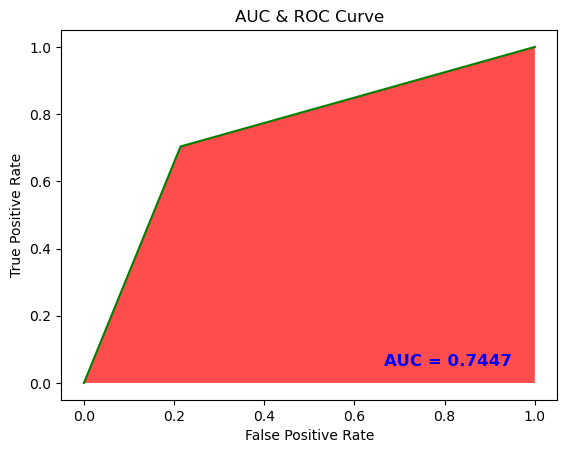

In [82]:
auc_roc(y_test,dct_test_pred)

In [83]:
from sklearn.naive_bayes import GaussianNB
nav=GaussianNB()
nav=nav.fit(X_train,y_train)

In [84]:
nav_train_pred=nav.predict(X_train)
nav_test_pred=nav.predict(X_test)

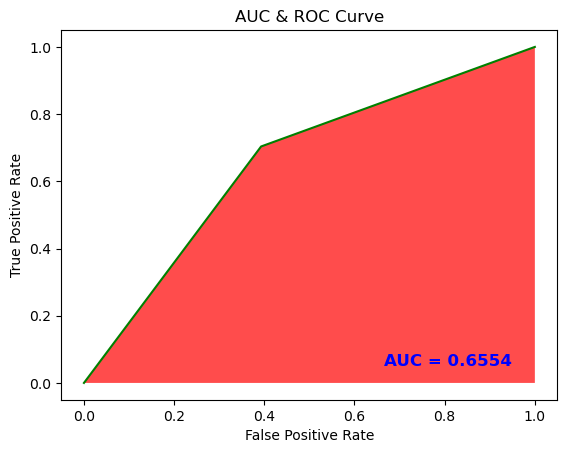

In [85]:
auc_roc(y_test,nav_test_pred)

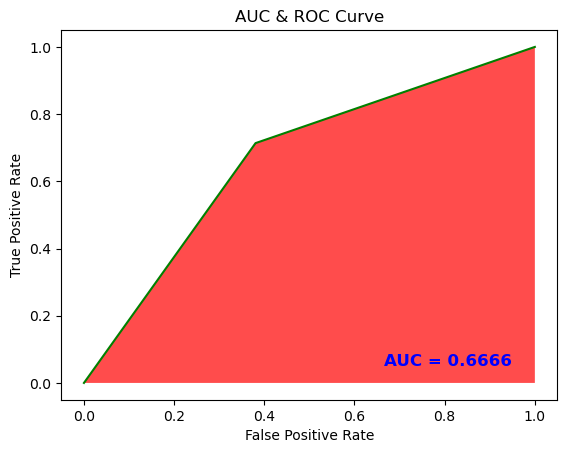

In [86]:
auc_roc(y_train,nav_train_pred)

In [87]:
param_grid = {
    'priors': [None, [0.2, 0.8], [0.5, 0.5]],  # Prior probabilities for classes
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6],  # Smoothing parameter for variance
}
nav_cv= GridSearchCV(nav, param_grid, cv=5)
nav_cv=nav_cv.fit(X_train, y_train)

In [88]:
best_params = nav_cv.best_params_

In [89]:
gnb= GaussianNB(**best_params)

In [90]:
gnb=gnb.fit(X_train,y_train)

In [91]:
gnb_train_pred=gnb.predict(X_train)
gnb_test_pred=gnb.predict(X_test)

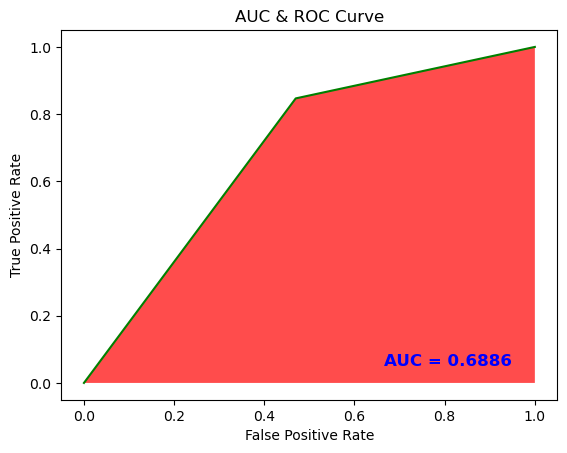

In [92]:
auc_roc(y_train,gnb_train_pred)

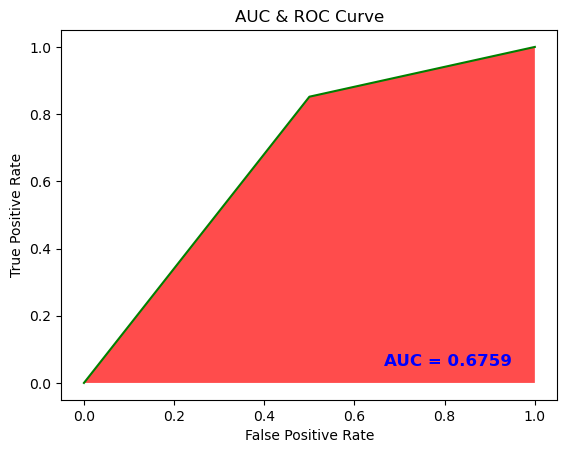

In [93]:
auc_roc(y_test,gnb_test_pred)

#  **Analysis on Test Data**

In [94]:
label=testdf['id']

In [95]:
label

0      414
1      415
2      416
3      417
4      418
      ... 
271    685
272    686
273    687
274    688
275    689
Name: id, Length: 276, dtype: int64

In [96]:
DataUnderstanding(testdf)

###The top 5 rows in the DataSet###
     id  gravity    ph  osmo  cond  urea   calc
0  414    1.017  5.24   345  11.5   152   1.16
1  415    1.020  5.68   874  29.0   385   3.46
2  416    1.024  5.36   698  19.5   354  13.00
3  417    1.020  5.33   668  25.3   252   3.46
4  418    1.011  5.87   567  29.0   457   2.36
****************************************************************************************************
###The shape of the DataSet###
 (276, 7)
****************************************************************************************************
###Data types of the columns###
 id           int64
gravity    float64
ph         float64
osmo         int64
cond       float64
urea         int64
calc       float64
dtype: object


In [97]:
Del_columns(testdf,Colm=['id'])

Before dropping:  Index(['id', 'gravity', 'ph', 'osmo', 'cond', 'urea', 'calc'], dtype='object')
After dropping:  Index(['gravity', 'ph', 'osmo', 'cond', 'urea', 'calc'], dtype='object')


In [98]:
test_df=pd.DataFrame(scaler.transform(testdf),columns=testdf.columns)

In [99]:
probs=log_reg.predict_proba(test_df)

In [100]:
sample=pd.read_csv("/kaggle/input/playground-series-s3e12/sample_submission.csv")

In [101]:
sample

,id,target
0,414,0.5
1,415,0.5
2,416,0.5
3,417,0.5
4,418,0.5
...,...,...
271,685,0.5
272,686,0.5
273,687,0.5
274,688,0.5


In [102]:
sample['id']=label

In [103]:
sample

,id,target
0,414,0.5
1,415,0.5
2,416,0.5
3,417,0.5
4,418,0.5
...,...,...
271,685,0.5
272,686,0.5
273,687,0.5
274,688,0.5


In [104]:
sample['target']=pd.DataFrame(probs,columns=['p','n'])['n']

In [105]:
sample

,id,target
0,414,0.283501
1,415,0.403765
2,416,0.978912
3,417,0.449744
4,418,0.254811
...,...,...
271,685,0.845843
272,686,0.240528
273,687,0.648683
274,688,0.298338


In [106]:
sample.to_csv("log_reg_ep12.csv",index=False)

In [107]:
probs1=svc.predict_proba(test_df)

In [108]:
sample['target']=pd.DataFrame(probs1,columns=['p','n'])['n']

In [109]:
sample

,id,target
0,414,0.287192
1,415,0.398714
2,416,0.974082
3,417,0.456390
4,418,0.316692
...,...,...
271,685,0.787963
272,686,0.264402
273,687,0.582596
274,688,0.306945


In [110]:
sample.to_csv("svc_ep12.csv",index=False)

In [111]:
probs2=rfc_rndcv.predict_proba(test_df)

In [112]:
sample['target']=pd.DataFrame(probs2,columns=['p','n'])['n']

In [113]:
sample.to_csv("rfc_rndcv_ep12.csv",index=False)

In [114]:
probs3=nav.predict_proba(test_df)

In [115]:
sample['target']=pd.DataFrame(probs3,columns=['p','n'])['n']

In [116]:
sample.to_csv("nav_ep12.csv",index=False)

In [117]:
probs4=gnb.predict_proba(test_df)

In [118]:
sample['target']=pd.DataFrame(probs4,columns=['p','n'])['n']

In [120]:
sample.to_csv("gnb_wsmep12.csv",index=False)

[CV] END ........depth=4, iterations=100, learning_rate=0.05; total time=   0.2s
[CV] END .........depth=4, iterations=100, learning_rate=0.1; total time=   0.2s
[CV] END .........depth=4, iterations=100, learning_rate=0.2; total time=   0.2s
[CV] END .........depth=4, iterations=100, learning_rate=0.2; total time=   0.2s
[CV] END ........depth=4, iterations=200, learning_rate=0.05; total time=   0.8s
[CV] END .........depth=4, iterations=200, learning_rate=0.1; total time=   0.6s
[CV] END .........depth=4, iterations=200, learning_rate=0.1; total time=   0.4s
[CV] END .........depth=4, iterations=200, learning_rate=0.2; total time=   0.6s
[CV] END ........depth=4, iterations=300, learning_rate=0.05; total time=   0.8s
[CV] END .........depth=4, iterations=300, learning_rate=0.1; total time=   0.9s
[CV] END .........depth=4, iterations=300, learning_rate=0.1; total time=   1.2s
[CV] END .........depth=4, iterations=300, learning_rate=0.2; total time=   1.5s
[CV] END .........depth=6, i